### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display the image in a larger size

In [2]:
def display(img,cmap=None):
    plt.figure(figsize=(8,8))
    plt.imshow(img,cmap=cmap)

### Read 'coins_image.jpg' with cv2

In [3]:
img=cv2.imread('coins_image.jpg')

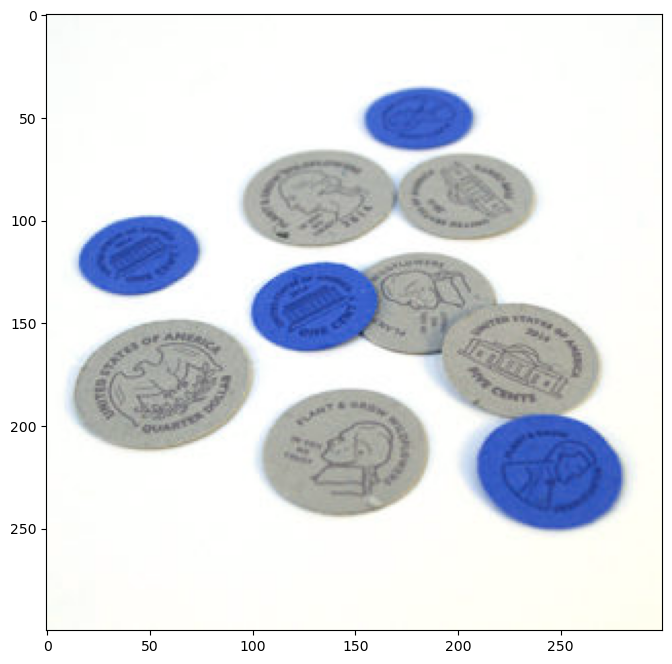

In [4]:
display(img)

### Apply Median Blur

In [5]:
blur=cv2.medianBlur(img,15)

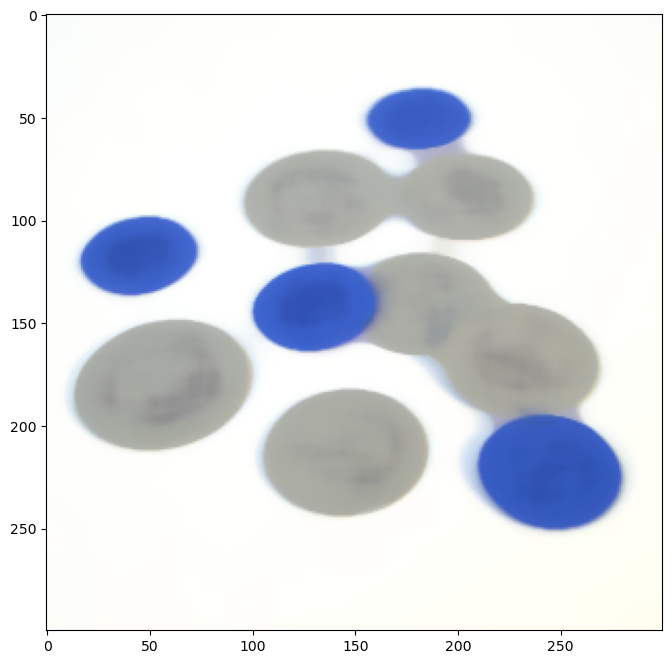

In [6]:
display(blur)

### Convert to Grayscale

In [7]:
gray=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

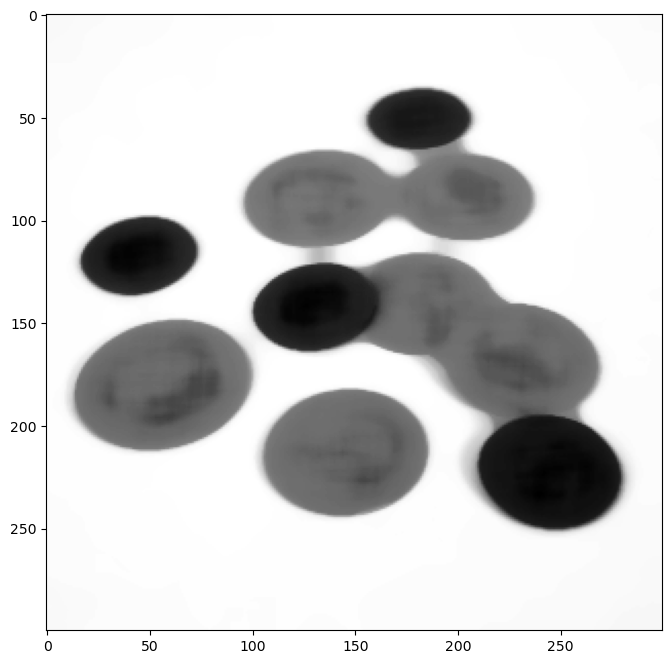

In [8]:
display(gray,cmap='gray')

### Apply threshold (Inverse binary with OTSU)

In [17]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

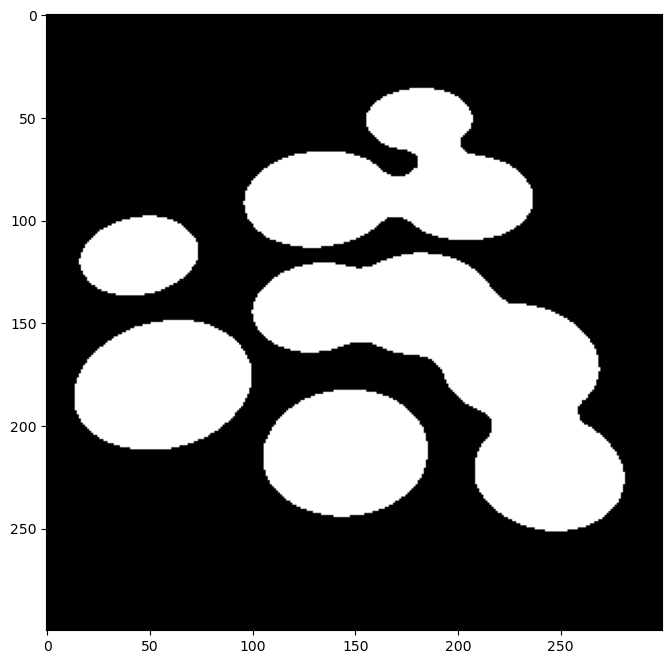

In [18]:
display(thresh,cmap='gray')

### Remove noise with the help of a morphological operator

In [21]:
kernel=np.ones((3,3))
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

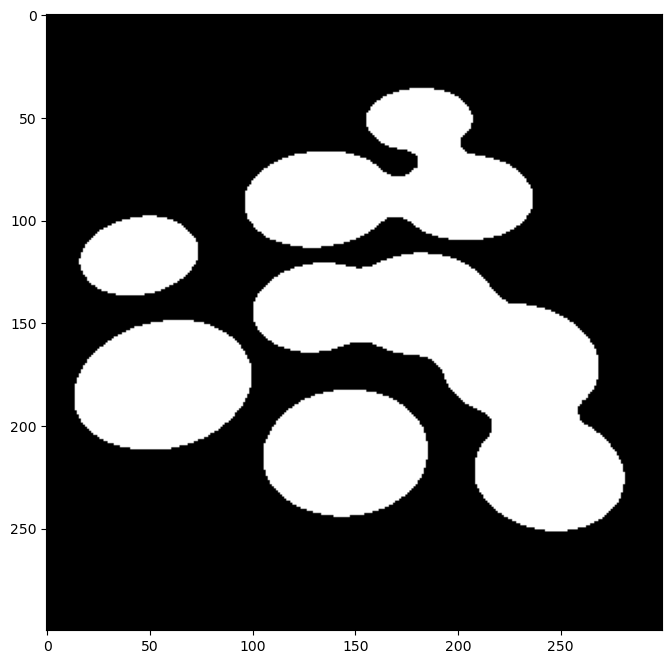

In [22]:
display(opening, cmap = 'gray')

### Grab background that you are sure of

In [27]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

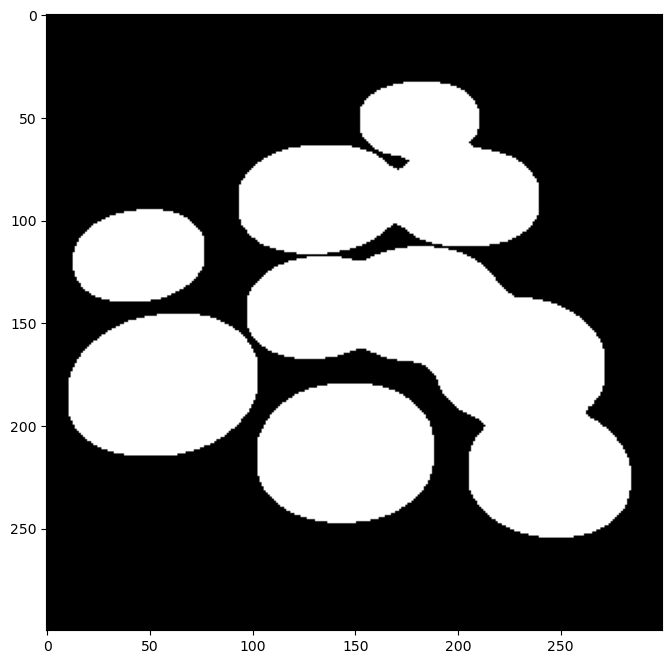

In [28]:
display(sure_bg, cmap = 'gray')

### Find sure Foreground

In [32]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,0)

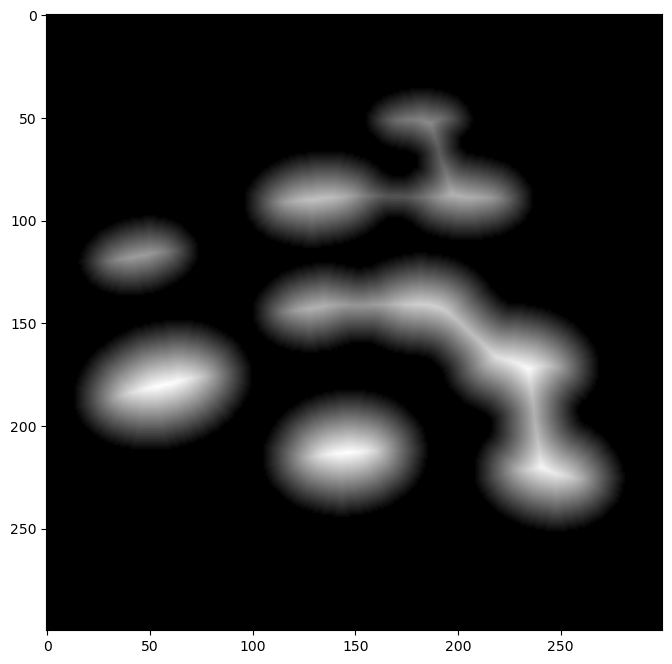

In [33]:
display(dist_transform, cmap = 'gray')

In [43]:
ret,sure_fg=cv2.threshold(dist_transform,0.40*dist_transform.max(),255,0)

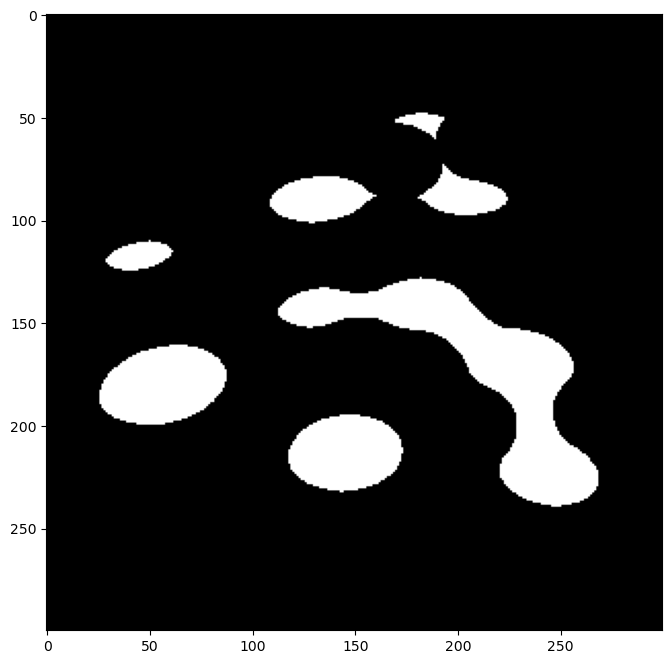

In [44]:
display(sure_fg, cmap = 'gray')

### Find unknown region

In [45]:
sure_fg=np.uint8(sure_fg)

In [46]:
unknown=cv2.subtract(sure_bg,sure_fg)

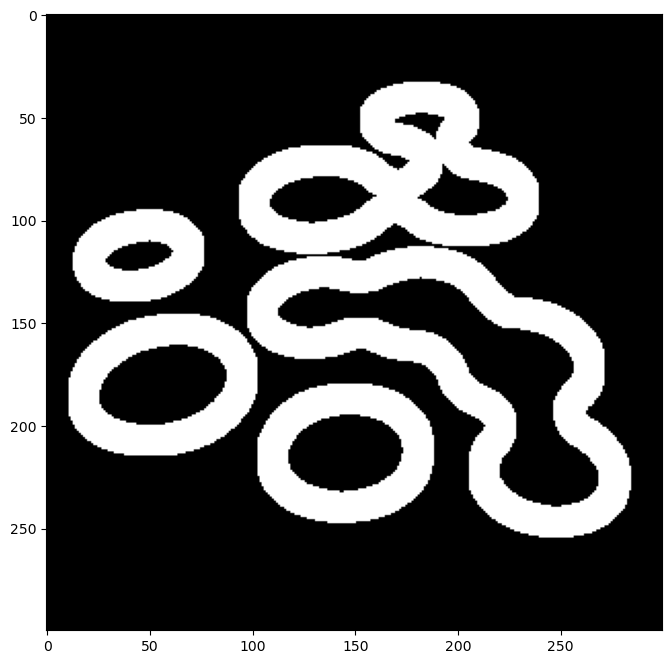

In [47]:
display(unknown, cmap = 'gray')

### Label Markers of sure Foreground

In [48]:
ret,markers=cv2.connectedComponents(sure_fg)

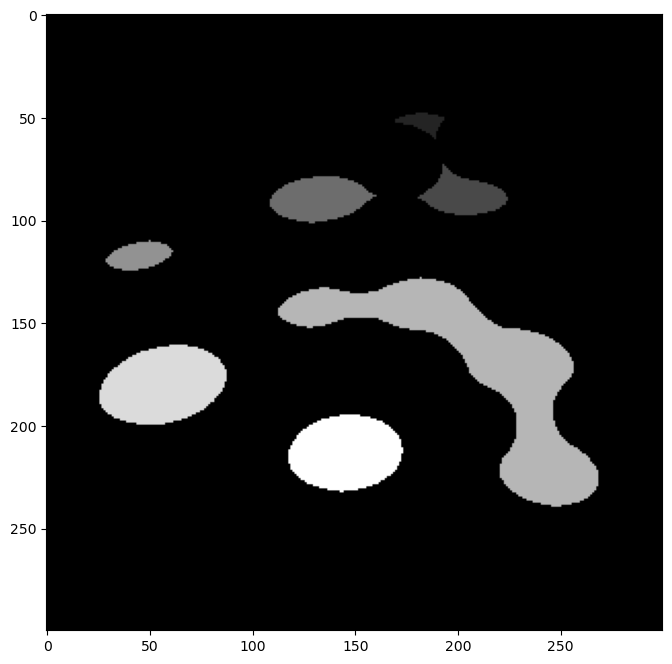

In [49]:
display(markers, cmap = 'gray')

In [50]:
markers=markers+1

In [51]:
markers[unknown==255]=0

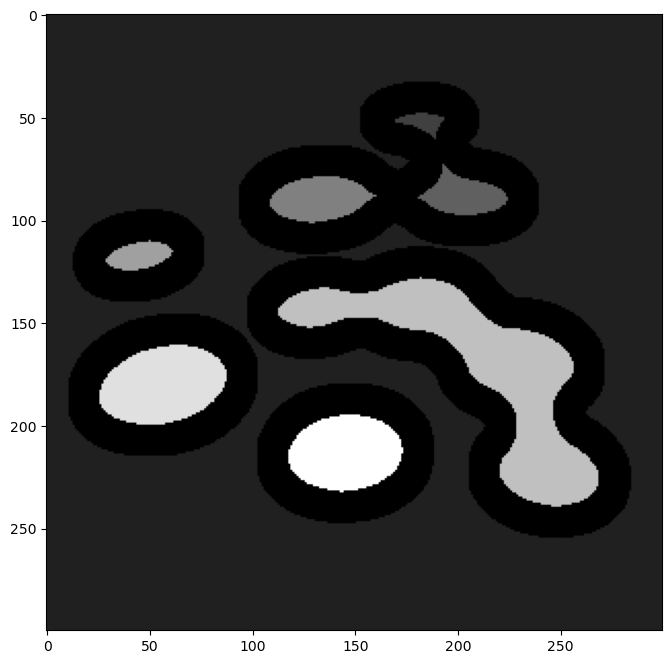

In [52]:
display(markers,cmap='gray')

### Apply watersheld alogirithm to find markers

In [54]:
markers=cv2.watershed(img,markers)

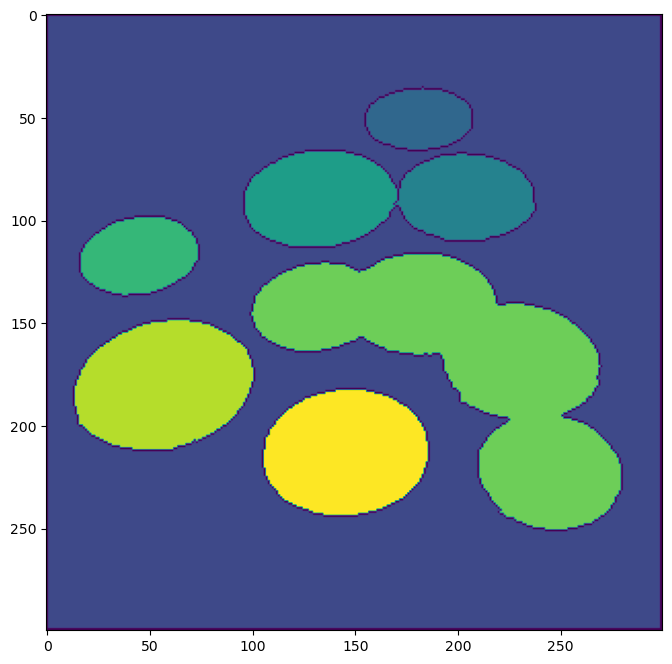

In [55]:
display(markers)

### Read the image again

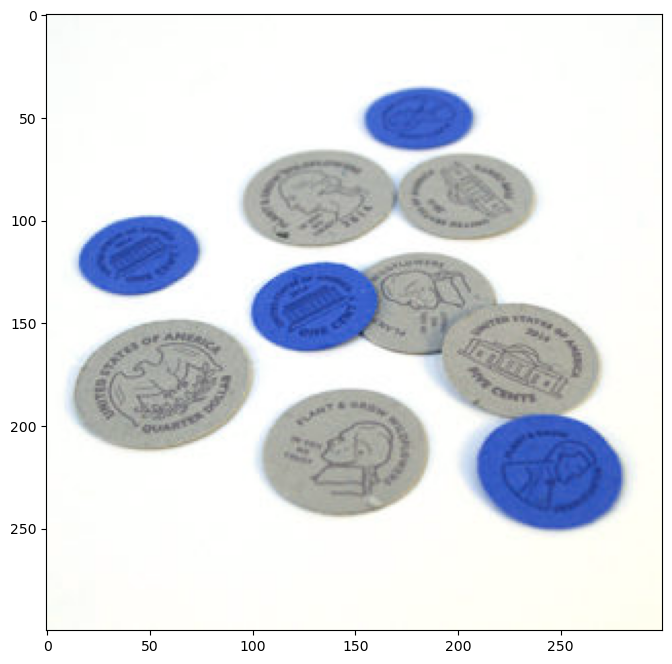

In [56]:
display(img)

### Find contours on Markers

In [57]:
contour,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [59]:
for i in range(len(contour)):
    if  hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contour,i,(255,0,0),3)
    

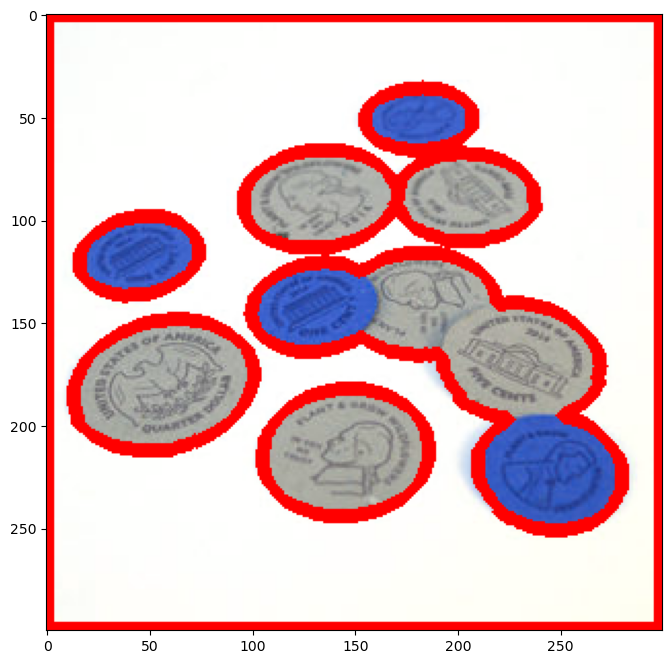

In [60]:
display(img)

***